In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/fd2b9bdf-dafd-4eaa-8141-d86331352ca3.methylation_array.sesame.level3betas.txt"
data = pd.read_csv(file_path, sep="\t", names=["CpG_ID", "Beta_Val"])

data = data.dropna()

methylation_type = []
for val in data["Beta_Val"]:
    if val > 0.2:
        methylation_type.append("Hypermethylation")
    else:
        methylation_type.append("Hypomethylation")

data["Methylation_Type"] = methylation_type
print(data)

           CpG_ID  Beta_Val  Methylation_Type
0      cg00000292  0.877321  Hypermethylation
1      cg00002426  0.963570  Hypermethylation
2      cg00003994  0.021861   Hypomethylation
3      cg00005847  0.484475  Hypermethylation
4      cg00006414  0.035751   Hypomethylation
...           ...       ...               ...
27573  cg27657283  0.023325   Hypomethylation
27574  cg27661264  0.400029  Hypermethylation
27575  cg27662379  0.008999   Hypomethylation
27576  cg27662877  0.019176   Hypomethylation
27577  cg27665659  0.042485   Hypomethylation

[24623 rows x 3 columns]


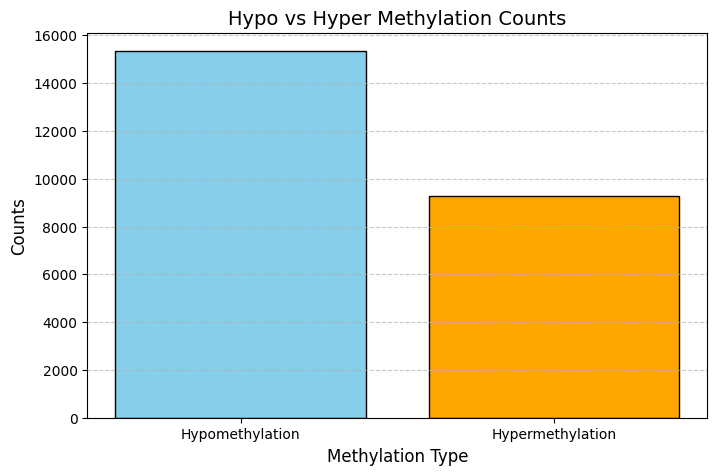

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/fd2b9bdf-dafd-4eaa-8141-d86331352ca3.methylation_array.sesame.level3betas.txt"
data = pd.read_csv(file_path, sep="\t", names=["CpG_Site", "Beta_Value"])

data = data.dropna()

methylation_type = []
for value in data["Beta_Value"]:
    if value < 0.2:
        methylation_type.append("Hypomethylation")
    else:
        methylation_type.append("Hypermethylation")

data["Methylation_Type"] = methylation_type

methylation_counts = data["Methylation_Type"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(methylation_counts.index, methylation_counts.values, color=["skyblue", "orange"], edgecolor="black")
plt.title("Hypo vs Hyper Methylation Counts", fontsize=14)
plt.xlabel("Methylation Type", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [4]:
print(methylation_counts )
print(len(data))

Methylation_Type
Hypomethylation     15343
Hypermethylation     9280
Name: count, dtype: int64
24623


In [5]:
na_values = data[data["Beta_Value"].isna()]  # NaN (NA) olan satırlar
print("NA Değerleri:", na_values)

NA Değerleri: Empty DataFrame
Columns: [CpG_Site, Beta_Value, Methylation_Type]
Index: []


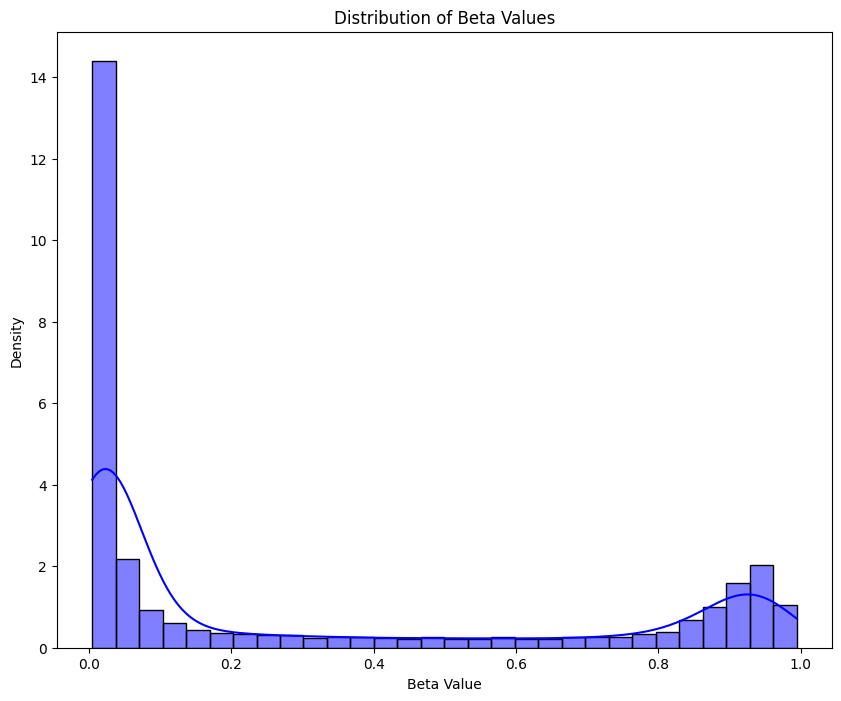

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(data['Beta_Value'], bins=30, kde=True, color='blue', stat="density")
plt.title("Distribution of Beta Values")
plt.xlabel("Beta Value")
plt.ylabel("Density")
plt.show()

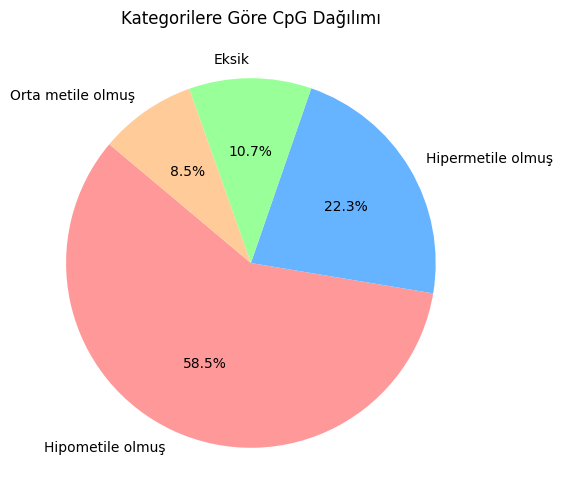

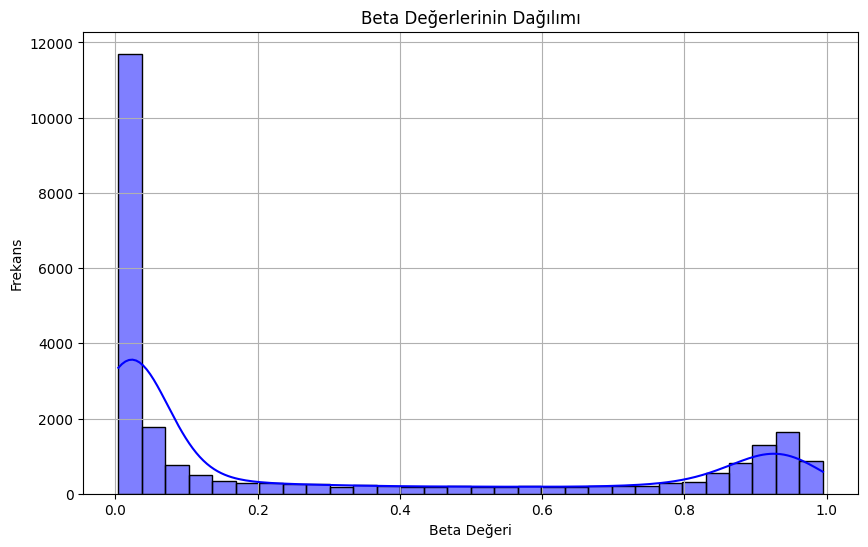

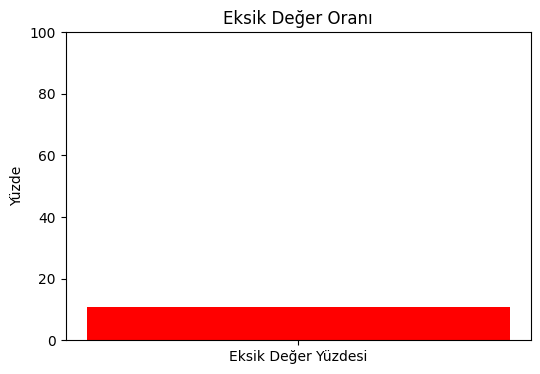

Kategori Dağılımı:
            Category  Count  Percentage
0   Hipometile olmuş  16129   58.485024
1  Hipermetile olmuş   6158   22.329393
2              Eksik   2955   10.715063
3  Orta metile olmuş   2336    8.470520

Beta Değerlerinin İstatistiksel Özeti:
count    24623.000000
mean         0.300108
std          0.374870
min          0.004254
25%          0.015367
50%          0.044847
75%          0.700155
max          0.994622
Name: Beta_Value, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yükleme ve ilk 5 satırı görüntüleme
file_path = r"/fd2b9bdf-dafd-4eaa-8141-d86331352ca3.methylation_array.sesame.level3betas.txt"
data = pd.read_csv(file_path, sep="\t", header=None, names=["CpG_ID", "Beta_Value"])

# Kategorilere ayırma işlemi
def categorize(beta_value):
    if pd.isna(beta_value):
        return "Eksik"
    elif beta_value < 0.3:
        return "Hipometile olmuş"
    elif beta_value < 0.7:
        return "Orta metile olmuş"
    else:
        return "Hipermetile olmuş"

data['Category'] = data['Beta_Value'].apply(categorize)

# Dağılım analizi: kategori başına sayım ve yüzde hesaplama
distribution = data['Category'].value_counts().reset_index()
distribution.columns = ["Category", "Count"]
distribution['Percentage'] = (distribution['Count'] / len(data)) * 100

# İstatistiksel analiz
stats = data['Beta_Value'].describe()

# Görselleştirme: Kategorilere göre dağılım (Pasta Grafiği)
plt.figure(figsize=(8, 6))
plt.pie(distribution['Count'], labels=distribution['Category'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Kategorilere Göre CpG Dağılımı")
plt.show()

# Görselleştirme: Beta değerlerinin histogramı
plt.figure(figsize=(10, 6))
sns.histplot(data['Beta_Value'].dropna(), kde=True, bins=30, color='blue')
plt.title("Beta Değerlerinin Dağılımı")
plt.xlabel("Beta Değeri")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

# Görselleştirme: Eksik değer oranı
missing_data = data['Category'].value_counts(normalize=True).loc['Eksik'] * 100
plt.figure(figsize=(6, 4))
plt.bar(['Eksik Değer Yüzdesi'], [missing_data], color='red')
plt.title("Eksik Değer Oranı")
plt.ylabel("Yüzde")
plt.ylim(0, 100)
plt.show()

# Analiz Sonuçlarının Yazdırılması
print("Kategori Dağılımı:")
print(distribution)
print("\nBeta Değerlerinin İstatistiksel Özeti:")
print(stats)

In [10]:
from scipy.stats import skew, kurtosis
skewness = data['Beta_Value'].dropna().skew()
kurt = data['Beta_Value'].dropna().kurtosis()
print(f"Çarpıklık: {skewness}, Basıklık: {kurt}")

Çarpıklık: 0.838971381780844, Basıklık: -1.0771632438940633


In [11]:
correlation_matrix = data.select_dtypes(include=['number']).corr()  # Filters numeric columns
print("Korelasyon matrisi:\n", correlation_matrix)


Korelasyon matrisi:
             Beta_Value
Beta_Value         1.0


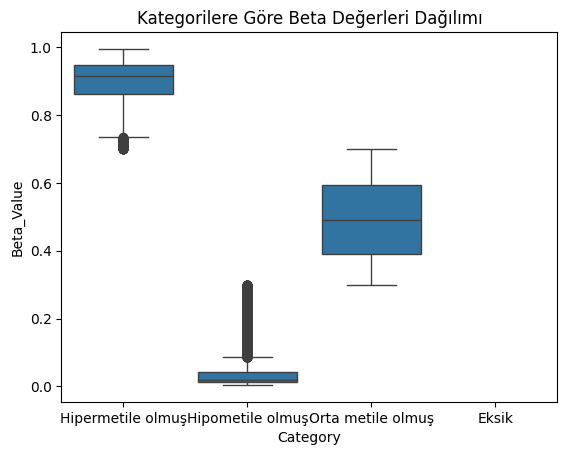

In [12]:
sns.boxplot(x='Category', y='Beta_Value', data=data)
plt.title("Kategorilere Göre Beta Değerleri Dağılımı")
plt.show()